# Proyek Analisis Data: Air Quality - Dataset
- **Nama:** Lilis Indra Purnama Sari
- **Email:** lilispurnama@apps.ipb.ac.id
- **ID Dicoding:** lilispurnama

## Menentukan Pertanyaan Bisnis

- Bagaimana tren tahunan, bulanan, dan harian dari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3)?
- Bagaimana perbandingan rata-rata kualitas udara antar stasiun pemantauan?
- Pada jam berapa dalam sehari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3) cenderung mencapai puncaknya?








## Import Semua Packages/Library yang Digunakan

In [31]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [29]:
# Menghubungkan gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Membaca Data dan membuat data frame
file_path = '/content/drive/My Drive/DBS Camp/Projek Dashboard/'
file_names = [
    "PRSA_Data_Aotizhongxin_20130301-20170228.csv",
    "PRSA_Data_Changping_20130301-20170228.csv",
    "PRSA_Data_Dingling_20130301-20170228.csv",
    "PRSA_Data_Dongsi_20130301-20170228.csv",
    "PRSA_Data_Guanyuan_20130301-20170228.csv",
    "PRSA_Data_Gucheng_20130301-20170228.csv",
    "PRSA_Data_Huairou_20130301-20170228.csv",
    "PRSA_Data_Nongzhanguan_20130301-20170228.csv",
    "PRSA_Data_Shunyi_20130301-20170228.csv",
    "PRSA_Data_Tiantan_20130301-20170228.csv",
    "PRSA_Data_Wanliu_20130301-20170228.csv",
    "PRSA_Data_Wanshouxigong_20130301-20170228.csv"
]

# Menggabungkan data secara vertikal berdasarkan peubah
dataframes = []
for file_name in file_names:
    full_path = os.path.join(file_path, file_name)
    df = pd.read_csv(full_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
print(combined_df)

           No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0           1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0   
1           2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0   
2           3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0   
3           4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0   
4           5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
420763  35060  2017      2   28    19   11.0  32.0   3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0   3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0   4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0   4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0   4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        

In [45]:
# Menampilkan daftar kolom
combined_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [46]:
# Melihat dimensi data
combined_df.shape

(420768, 18)

**Insight:**
- Dataset yang digunakan diambil dari dataset air quality dan menggunakan semua data dari berbagai negara.
- Membaca data kemudian menggabungkan data secara vertikal berdasarkan peubah.
- Total baris data setelah di merge berjumlah 420768 dengan total kolom 18

### Assessing Data

#### Menilai Data

In [47]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


#### Melihat Missing Value

In [48]:
combined_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


#### Melihat Data Duplikasi

In [49]:
combined_df.duplicated().sum()

0

#### Melihat outlier menggunakan boxplot

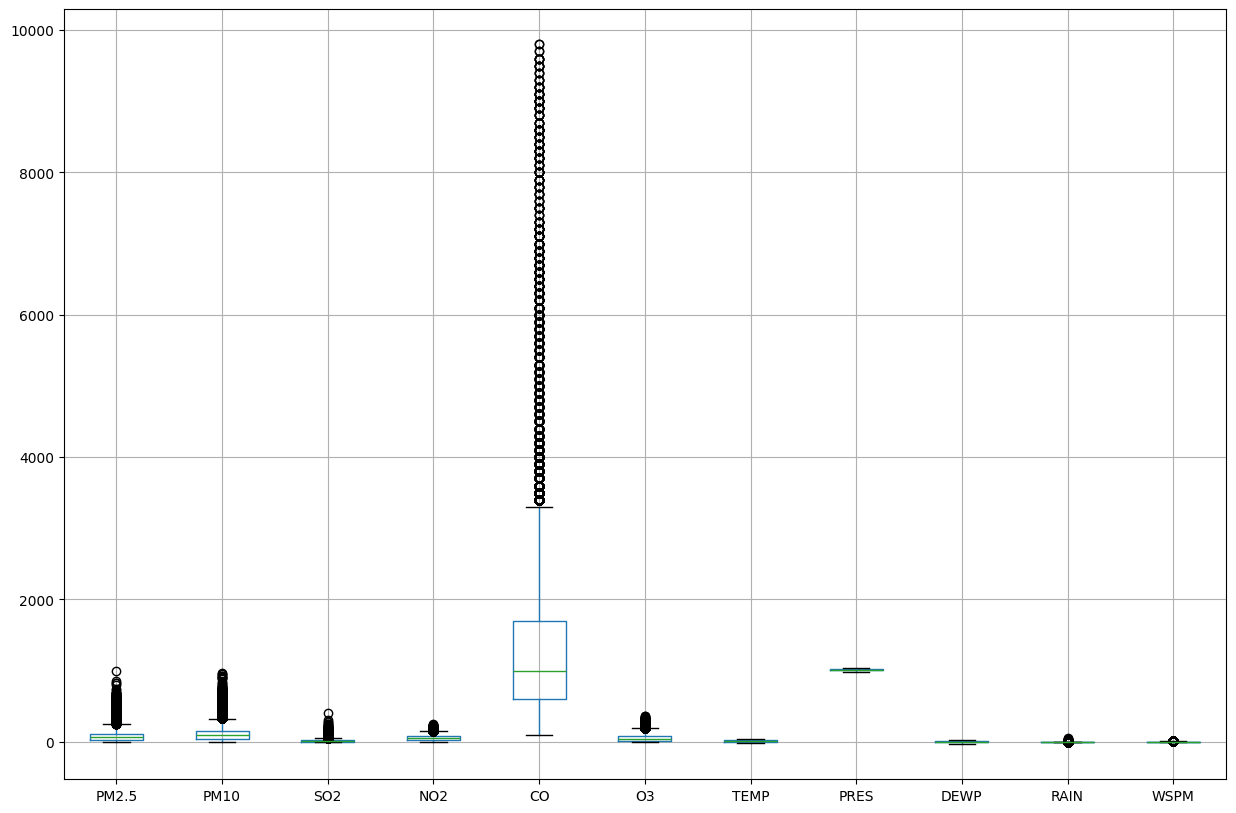

In [50]:
kolom_peubah = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']
df_peubah = df[kolom_peubah]

plt.figure(figsize=(15, 10))
df_peubah.boxplot()
plt.show()

**Insight:**
- Dari dataset tersebut terdapat missing value pada peubah
  * PM2.5 sebanyak 8739
  * PM10 sebanyak 6449
  * SO2 sebanyak 9021
  * NO2 sebanyak 12116
  * CO sebanyak 20701
  * O3 sebanyak 13277
  * Temp sebanyak 398
  * Pres sebanyak 393
  * Dewp sebanyak 403
  * Rain sebanyak 390
  * Wd sebanyak 1822
- Dari dataset tersebut tidak ada data duplikat
- Boxplot ini menunjukkan bahwa ada kemungkinan polusi udara dengan nilai CO yang sangat ekstrem pada beberapa titik waktu.
- Sebaran data untuk polutan udara (PM2.5, PM10, SO2, NO2, O3) cenderung memiliki outlier yang mengindikasikan lonjakan polusi sesekali.

### Cleaning Data

#### Menangani Peubah Menggunakan Metode Interpolasi

In [88]:
# Membaca missing data di peubah PM2.5, PM10, SO2, Temp, DEWP, WSPM
combined_df[combined_df[['PM2.5', 'PM10', 'SO2', 'TEMP', 'DEWP', 'WSPM']].isnull().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,-6.100000,1011.516205,-20.300000,0.0,NE,NaN,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,0.500000,1011.516205,-11.850000,0.0,NE,NaN,Aotizhongxin
31315,31316,2016,9,25,19,168.0,168.0,2.0,77.0,1500.0,65.0,25.457143,1011.516205,19.357143,0.0,NE,NaN,Aotizhongxin
31316,31317,2016,9,25,20,182.0,182.0,2.0,82.0,1600.0,46.0,24.714286,1011.516205,19.114286,0.0,NE,NaN,Aotizhongxin
31317,31318,2016,9,25,21,137.0,146.0,2.0,44.0,1400.0,122.0,23.971429,1011.516205,18.871429,0.0,NE,NaN,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419789,34086,2017,1,19,5,111.0,137.0,40.0,84.0,2800.0,5.0,-2.192857,1011.516205,-8.871429,0.0,NE,NaN,Wanshouxigong
419790,34087,2017,1,19,6,124.0,142.0,32.0,84.0,2700.0,4.0,-2.357143,1011.516205,-8.628571,0.0,NE,NaN,Wanshouxigong
419791,34088,2017,1,19,7,114.0,143.0,32.0,83.0,2800.0,4.0,-2.521429,1011.516205,-8.385714,0.0,NE,NaN,Wanshouxigong
419989,34286,2017,1,27,13,46.0,68.0,11.0,13.0,700.0,70.0,2.093750,1011.516205,-15.750000,0.0,NE,NaN,Wanshouxigong


In [90]:
# Menangani missing data di peubah PM2.5, PM10, SO2, Temp, DEWP, WSPM
combined_df['PM2.5'].interpolate(method='linear', inplace=True)
combined_df['PM10'].interpolate(method='linear', inplace=True)
combined_df['SO2'].interpolate(method='linear', inplace=True)
combined_df['TEMP'].interpolate(method='linear', inplace=True)
combined_df['DEWP'].interpolate(method='linear', inplace=True)
combined_df['WSPM'].interpolate(method='linear', inplace=True)

<ipython-input-90-e211ed0ccf19>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['PM2.5'].interpolate(method='linear', inplace=True)
<ipython-input-90-e211ed0ccf19>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [91]:
# Membaca data setelah penanganan peubah PM2.5, PM10, SO2, Temp, DEWP, WSPM
combined_df[['PM2.5', 'PM10', 'SO2', 'TEMP', 'DEWP', 'WSPM']].isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
TEMP,0
DEWP,0
WSPM,0


#### Menangani peubah Menggunakan Metode Imputasi

In [72]:
# Membaca missing data di peubah NO2, O3, PRES, RAIN, wd
combined_df[combined_df[['NO2', 'O3', 'PRES', 'RAIN', 'wd']].isnull().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
76,77,2013,3,4,4,7.0,18.0,14.00,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
172,173,2013,3,8,4,322.0,345.0,62.00,NaN,3299.0,84.0,1.3,998.5,-1.8,0.0,W,1.0,Aotizhongxin
435,436,2013,3,19,3,33.0,41.0,15.00,50.0,NaN,NaN,0.8,1005.8,-3.0,0.0,ENE,1.5,Aotizhongxin
436,437,2013,3,19,4,31.0,35.0,15.00,49.0,NaN,NaN,0.1,1005.4,-3.5,0.0,N,1.4,Aotizhongxin
531,532,2013,3,23,3,51.0,70.0,12.00,85.0,NaN,NaN,1.5,1008.5,-2.5,0.0,WNW,0.6,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420731,35028,2017,2,27,11,104.5,122.5,29.75,NaN,NaN,NaN,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,35029,2017,2,27,12,106.0,118.0,27.50,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,107.5,113.5,25.25,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
420759,35056,2017,2,28,15,11.0,21.0,2.00,5.0,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


In [76]:
# Menangani missing data di peubah NO2, O3, PRES, RAIN, wd
combined_df['NO2'].fillna(df['NO2'].median(), inplace=True)
combined_df['O3'].fillna(df['O3'].median(), inplace=True)
combined_df['PRES'].fillna(df['PRES'].mean(), inplace=True)
combined_df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
combined_df['wd'].fillna(df['wd'].mode()[0], inplace=True)

<ipython-input-76-ed40071e16d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['NO2'].fillna(df['NO2'].median(), inplace=True)
<ipython-input-76-ed40071e16d5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [77]:
# Membaca data setelah penanganan peubah NO2, O3, PRES, RAIN, wd
combined_df[['NO2', 'O3', 'PRES', 'RAIN', 'wd']].isnull().sum()

,0
NO2,0
O3,0
PRES,0
RAIN,0
wd,0


#### Melakukan Penanganan Menggunakan Metode Hapus Kolom

In [78]:
# Membaca missing data di peubah CO
combined_df[combined_df[['CO']].isnull().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
171,172,2013,3,8,3,324.0,373.0,71.0000,154.0000,NaN,84.0,1.8,997.9,-1.8,0.0,N,0.0,Aotizhongxin
178,179,2013,3,8,10,326.0,844.0,125.9496,179.2269,NaN,84.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Aotizhongxin
267,268,2013,3,12,3,117.0,127.0,73.0000,81.0000,NaN,47.0,6.4,1005.8,-1.0,0.1,N,2.2,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420709,35006,2017,2,26,13,21.0,31.5,6.5000,49.0000,NaN,42.0,12.4,1020.0,-8.2,0.0,NW,1.2,Wanshouxigong
420731,35028,2017,2,27,11,104.5,122.5,29.7500,49.0000,NaN,42.0,10.0,1018.3,-5.6,0.0,ESE,1.4,Wanshouxigong
420732,35029,2017,2,27,12,106.0,118.0,27.5000,49.0000,NaN,42.0,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
420733,35030,2017,2,27,13,107.5,113.5,25.2500,49.0000,NaN,42.0,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong


In [110]:
# Menangani missing data di peubah CO
combined_df.drop(columns=['CO'], inplace=True)

#### Mendeteksi Outlier

In [113]:
# Setelah cleaning
combined_df_clean = combined_df.copy()  # Salin data setelah cleaning
print("\nMissing values setelah cleaning:")
print(combined_df_clean.isnull().sum())


Missing values setelah cleaning:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [117]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menampilkan jumlah outlier
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'Jumlah outlier di {column}:', len(outliers))
    return outliers

outliers_pm25 = detect_outliers_iqr(combined_df, 'PM2.5')
outliers_pm10 = detect_outliers_iqr(combined_df, 'PM10')
outliers_so2 = detect_outliers_iqr(combined_df, 'SO2')
outliers_no2 = detect_outliers_iqr(combined_df, 'NO2')
outliers_o3 = detect_outliers_iqr(combined_df, 'O3')
outliers_temp = detect_outliers_iqr(combined_df, 'TEMP')
outliers_dew = detect_outliers_iqr(combined_df, 'DEWP')
outliers_pres = detect_outliers_iqr(combined_df, 'PRES')
outliers_rain = detect_outliers_iqr(combined_df, 'RAIN')
outliers_wspm = detect_outliers_iqr(combined_df, 'WSPM')

Jumlah outlier di PM2.5: 18483
Jumlah outlier di PM10: 13825
Jumlah outlier di SO2: 35426
Jumlah outlier di NO2: 6756
Jumlah outlier di O3: 16703
Jumlah outlier di TEMP: 0
Jumlah outlier di DEWP: 0
Jumlah outlier di PRES: 0
Jumlah outlier di RAIN: 15781
Jumlah outlier di WSPM: 22042


**Insight:**
- Penanganan missing value menggunakan metode interpolasi pada peubah PM2.5, PM10, SO2, Temp, DEWP, WSPM
- Penanganan missing value menggunakan metode imputasi menggunakan mean pada peubah PRES
- Penanganan missing value menggunakan metode imputasi menggunakan median pada peubah NO2, O3, RAIN
- Penanganan missing value menggunakan metode imputasi menggunakan modus pada peubah wd
- Penanganan missing value menggunakan metode hapus kolom pada peubah CO
- Melihat adanya outlier pada masing-masing peubah tetapi tidak ditangani karena akan dilihat polanya pada bagian eksplorasi data

## Exploratory Data Analysis (EDA)

### Explore ...

#### Melihat statistika deskriptif dari variabel numerik

In [119]:
combined_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000,400067.000000
mean,17903.276411,2014.709861,6.463607,15.706964,11.521233,79.603790,104.801407,15.741492,50.626504,57.196572,13.497166,1010.804734,2.422561,0.064835,1.733608
std,10011.026552,1.160166,3.448100,8.811580,6.928229,80.364722,92.047668,21.783669,34.874361,56.324841,11.432728,10.443363,13.779405,0.820731,1.246763
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,9485.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,11.000000,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18042.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,44.000000,44.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26517.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,146.000000,19.000000,71.000000,81.000000,23.200000,1019.000000,15.000000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Membuat histogram untuk semua peubah numerik

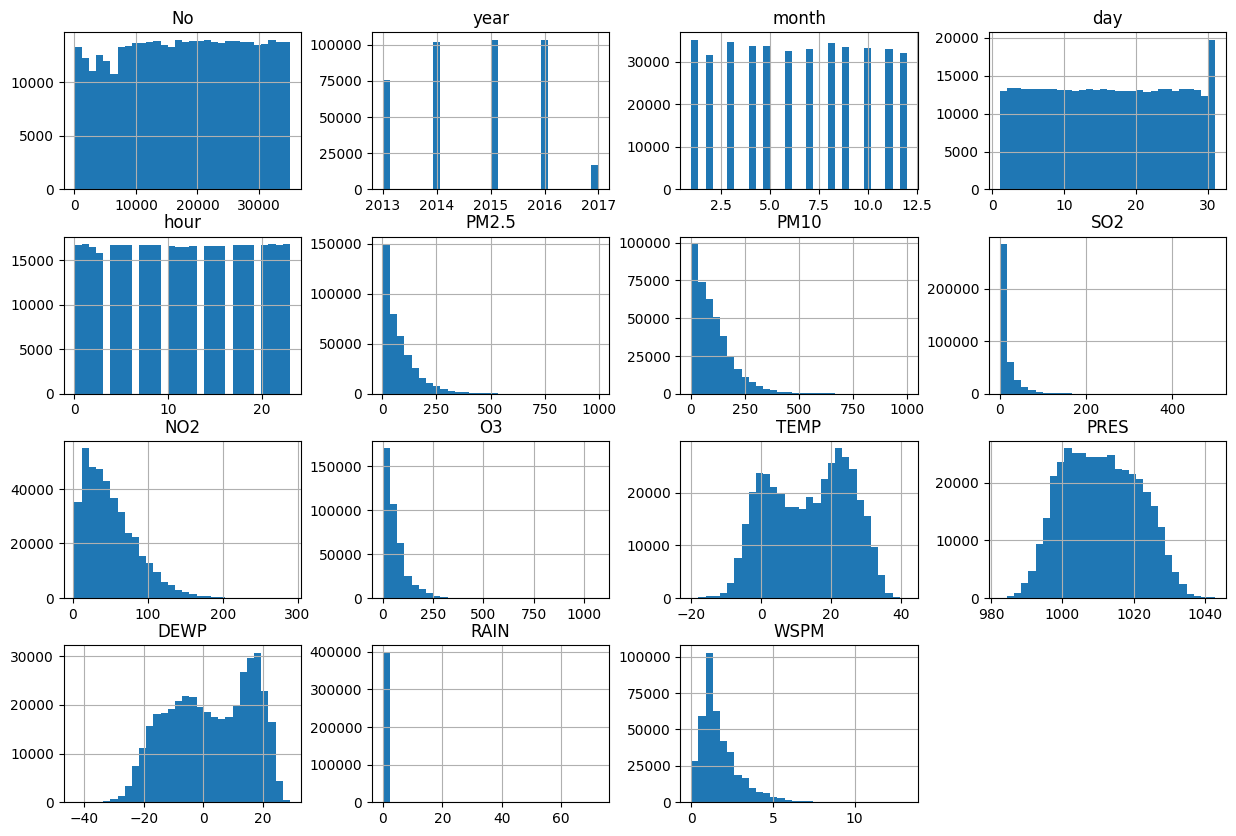

In [122]:
combined_df.hist(figsize=(15, 10), bins=30)
plt.show()

**Insight:**
- PM2.5, PM10, SO2, NO2, O3: Distribusinya right-skewed (condong ke kiri), artinya sebagian besar nilai rendah, tetapi ada beberapa nilai ekstrem (outlier) yang tinggi.
- TEMP (Temperatur): Distribusi berbentuk normal, dengan sebagian besar suhu berada dalam rentang yang wajar.
- PRES (Tekanan Udara): Juga berbentuk normal, menunjukkan variasi alami dalam tekanan atmosfer.
- DEWP (Dew Point / Titik Embun): Distribusi mirip dengan suhu, menunjukkan pola alami kelembapan udara.
- RAIN (Curah Hujan): Mayoritas data berada di angka nol, menunjukkan bahwa hari hujan relatif jarang terjadi.
- WSPM (Kecepatan Angin): Distribusi right-skewed, menunjukkan bahwa sebagian besar waktu angin bertiup dengan kecepatan rendah.

#### Korelasi Antar Peubah

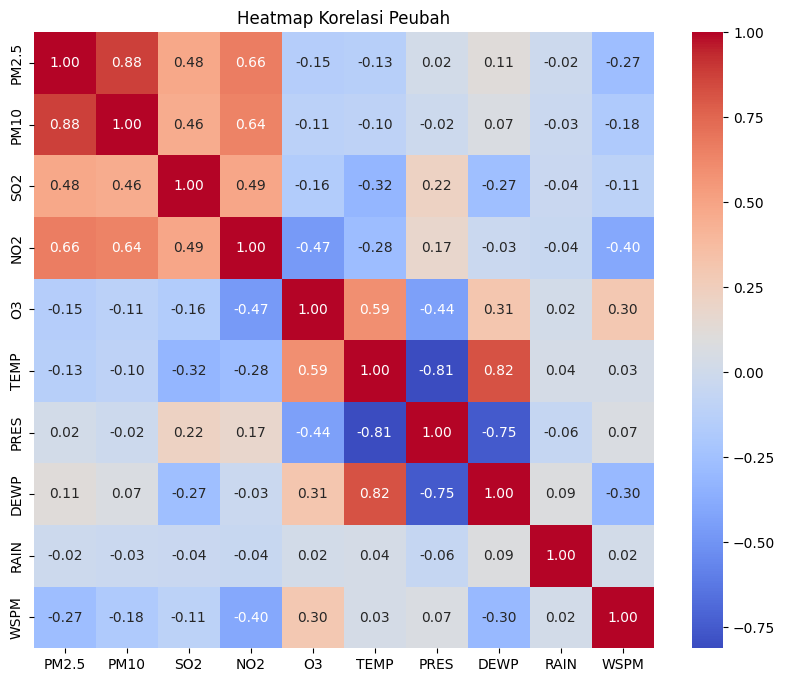

In [124]:
# Melihat Korelasi Antar Peubah
numerical_df = combined_df.select_dtypes(include=['float'])

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Peubah")
plt.show()

**Insight:**
Hubungan antar peubah yang memiliki korelasi sangat kuat :
* PM2.5 & PM10 (0.88) →  Ini menunjukkan bahwa jika satu meningkat, yang lain cenderung ikut meningkat. Ini masuk akal karena keduanya adalah partikel polutan udara dengan ukuran berbeda tetapi berasal dari sumber yang mirip (misalnya, emisi kendaraan, pembakaran bahan bakar).
* TEMP & DEWP (0.82) → Suhu dan titik embun sangat berhubungan, karena titik embun adalah indikator kelembapan udara.
* TEMP & PRES (-0.81) → Ini menunjukkan adanya hubungan negatif yang sangat kuat. Saat tekanan udara tinggi, suhu cenderung lebih rendah (karakteristik atmosfer umum).
* PRES & DEWP (-0.75) → Ini menunjukkan adanya hubungan negatif yang sangat kuat.Tekanan udara tinggi biasanya dikaitkan dengan kelembapan yang lebih rendah.

#### Mengelompokkan sumber polutan utama berdasarkan tahun, bulan, dan hari

In [136]:
# Mengelompokkan data sumber polusi utama berdasarkan tahun dan menghitung rata-rata polutan
yearly_trend = combined_df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
yearly_trend

,PM2.5,PM10,SO2,NO2,O3
year,,,,,
2013,80.502969,103.952665,20.022806,52.626262,57.011438
2014,85.248697,116.068870,20.947904,54.727813,58.079905
2015,79.087894,103.507334,13.024849,48.194580,59.215855
2016,71.994027,94.831729,9.811882,46.537812,57.192510
2017,91.451313,109.611950,18.185134,56.992388,40.019212


In [137]:
# Mengelompokkan data sumber polusi utama berdasarkan bulan dan menghitung rata-rata polutan
monthly_trend = combined_df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
monthly_trend

,PM2.5,PM10,SO2,NO2,O3
month,,,,,
1,93.214392,112.667932,31.579669,61.530129,27.877467
2,86.805747,102.551233,28.366913,50.191645,40.832059
3,94.789464,137.165446,27.937566,60.008724,50.973147
4,73.191875,117.458174,14.150657,47.446313,69.982536
5,62.765077,106.393607,14.032019,42.151382,92.094295
6,68.233836,86.187665,7.695223,39.233062,94.453436
7,71.264775,84.949165,5.465604,35.776070,95.172446
8,53.192522,71.367550,4.635356,36.270745,87.602954
9,60.785847,79.025594,6.273162,45.581778,54.730637


In [138]:
# Mengelompokkan data berdasarkan hari dalam bulan dan menghitung rata-rata polutan
daily_trend = combined_df.groupby('day')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
daily_trend

,PM2.5,PM10,SO2,NO2,O3
day,,,,,
1,86.804511,109.310216,13.847950,50.123076,55.378761
2,73.488058,92.383227,16.167103,50.580776,53.872461
3,83.635994,110.373824,16.354223,52.294365,58.483365
4,86.898111,109.960884,15.100722,52.318931,58.694285
5,76.078853,100.917198,14.316703,46.896893,62.963290
6,85.180628,106.668818,17.414653,49.844683,59.133228
7,83.785694,103.489829,16.244124,49.456383,58.243273
8,80.601363,101.969182,16.812470,47.998064,59.118883
9,71.746346,97.906571,14.252425,47.664006,56.889358


#### Melihat Statistik Deskriptif Masing-Masing Stasiun

In [139]:
station_stats = combined_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].describe()
station_stats

PM2.5                                                     \
                 count       mean        std  min        25%   50%    75%   
station                                                                     
Aotizhongxin   33288.0  82.291653  80.443004  3.0  22.000000  58.0  114.0   
Changping      33543.0  70.268261  71.128170  2.5  18.000000  46.0   99.0   
Dingling       33052.0  66.260330  72.777610  3.0  14.000000  41.0   93.0   
Dongsi         31867.0  86.021089  86.261540  3.0  22.000000  61.0  119.0   
Guanyuan       33311.0  83.115798  81.196899  3.0  23.000000  59.0  115.0   
Gucheng        33663.0  83.914314  82.660932  2.0  24.000000  60.0  116.0   
Huairou        33642.0  69.658202  71.096582  2.0  17.000000  47.0   98.0   
Nongzhanguan   33858.0  84.623301  85.628833  2.0  22.000000  59.0  116.0   
Shunyi         32886.0  79.556009  81.170973  2.0  19.000000  55.0  112.0   
Tiantan        33938.0  81.902559  80.299148  3.0  22.000000  58.0  113.0   
Wanliu         33252.0  82.866673  81.436863  2.0  23.000000  58.0  115.0   
Wanshouxigong  33767.0  84.869269  85.280870  3.0  22.166667  60.0  116.0   

                         PM10              ...   NO2              O3  \
                 max    count        mean  ...   75%    max    count   
station                                    ...                         
Aotizhongxin   898.0  33288.0  109.575156  ...  82.0  290.0  33288.0   
Changping      882.0  33543.0   94.328674  ...  61.0  208.0  33543.0   
Dingling       881.0  33052.0   83.817770  ...  39.0  205.0  33052.0   
Dongsi         737.0  31867.0  111.447413  ...  73.0  258.0  31867.0   
Guanyuan       680.0  33311.0  109.264421  ...  78.0  270.0  33311.0   
Gucheng        770.0  33663.0  119.367939  ...  78.0  271.0  33663.0   
Huairou        762.0  33642.0   91.895532  ...  49.0  231.0  33642.0   
Nongzhanguan   844.0  33858.0  108.978333  ...  80.0  273.0  33858.0   
Shunyi         941.0  32886.0   99.620936  ...  62.0  258.0  32886.0   
Tiantan        821.0  33938.0  106.382111  ...  71.0  238.0  33938.0   
Wanliu         957.0  33252.0  110.243598  ...  87.0  264.0  33252.0   
Wanshouxigong  999.0  33767.0  112.608823  ...  77.0  241.0  33767.0   

                                                                       
                    mean        std     min   25%   50%   75%     max  
station                                                                
Aotizhongxin   55.764502  57.091534  0.2142   8.0  42.0  81.0   423.0  
Changping      57.728545  54.102349  0.2142  15.0  46.0  79.0   429.0  
Dingling       68.946200  53.832293  0.2142  32.0  61.0  90.0   500.0  
Dongsi         56.495968  57.306511  1.0000  12.0  44.0  80.0  1071.0  
Guanyuan       55.672145  57.297670  0.2142   7.0  42.0  81.0   415.0  
Gucheng        58.005408  57.070795  0.4284  10.0  44.0  84.0   450.0  
Huairou        59.526923  54.417184  0.2142  18.0  48.0  82.0   444.0  
Nongzhanguan   58.622584  58.454801  0.2142  10.0  45.0  84.0   390.0  
Shunyi         54.653887  53.812796  0.2142  11.0  42.0  76.0   340.0  
Tiantan        56.027633  58.938693  0.4284   8.0  41.0  80.0   674.0  
Wanliu         49.037335  54.412766  0.2142   4.0  35.0  72.0   364.0  
Wanshouxigong  55.872142  56.735584  0.2142   8.0  42.0  81.0   358.0  

[12 rows x 40 columns]

#### Melihat Rata-rata Polutan Utama Tiap stasiun

In [142]:
station_avg = combined_df.groupby('station')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
station_avg

,PM2.5,PM10,SO2,NO2,O3
station,,,,,
Aotizhongxin,82.291653,109.575156,17.280830,59.095320,55.764502
Changping,70.268261,94.328674,15.034013,44.384557,57.728545
Dingling,66.260330,83.817770,11.685376,27.642769,68.946200
Dongsi,86.021089,111.447413,18.289692,53.597668,56.495968
Guanyuan,83.115798,109.264421,17.357287,57.854187,55.672145
Gucheng,83.914314,119.367939,15.386489,55.627573,58.005408
Huairou,69.658202,91.895532,12.066662,32.992937,59.526923
Nongzhanguan,84.623301,108.978333,18.547119,58.073754,58.622584
Shunyi,79.556009,99.620936,13.726757,44.769335,54.653887


#### Menghitung Rata-Rata Berdasarkan Jam

In [147]:
hourly_avg = combined_df.groupby('hour')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
hourly_avg

,PM2.5,PM10,SO2,NO2,O3
hour,,,,,
0,87.356522,114.981498,14.903507,57.755892,41.961984
1,86.550976,111.930603,14.943924,55.611789,38.203016
2,84.370555,107.455905,14.778868,53.487177,34.448583
3,81.714128,102.545979,13.459697,52.793547,32.182469
4,79.182525,97.783900,13.037452,51.516980,31.753544
5,76.299607,93.816595,12.657053,50.837316,28.595773
6,73.966412,92.070880,12.637590,50.748551,27.431123
7,73.145303,93.757862,13.114076,52.587453,25.661628
8,74.426121,98.680649,14.727118,54.298271,27.316630


**Insight:**
* Pada Proses EDA ini dilakukan dengan cara melihat statistik deskriptif pada peubah numerik
* Membuat histogram pada peubah numerik untuk melihat distribusi setiap peubahnya
* Melihat korelasi antar peubah
* Mengelompokkan sumber polutan utama berdasarkan tahun, bulan, dan hari untuk melihat persebarannya pada beberapa durasi waktu
* Melihat statistik deskriptif pada masing-masing stasiun sehingga mendapatkan informasi mengenai polutan utama pada masing-masing stasiun
* Menghitung rata-rata polutan utama berdasarkan jam supaya melihat waktu-waktu tertentu polutan tersebut mencapai puncaknya

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren tahunan, bulanan, dan harian dari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3)?

#### Tren Tahunan

<Figure size 1200x600 with 0 Axes>

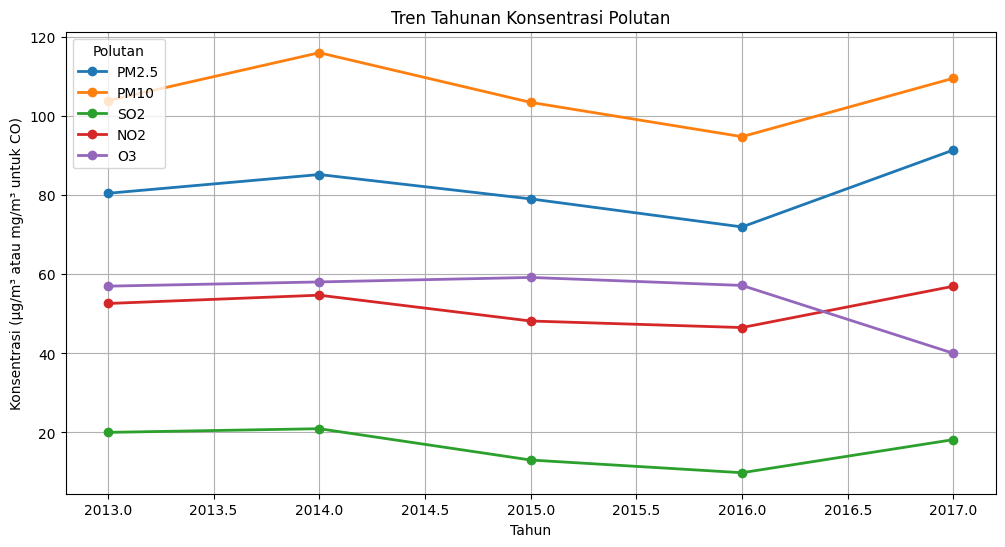

In [126]:
plt.figure(figsize=(12, 6))

# Plot tren tahunan
yearly_trend.plot(marker='o', linewidth=2, figsize=(12, 6))
plt.title('Tren Tahunan Konsentrasi Polutan')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi (µg/m³ atau mg/m³ untuk CO)')
plt.legend(title='Polutan')
plt.grid(True)
plt.show()

#### Tren Bulanan

<Figure size 1200x600 with 0 Axes>

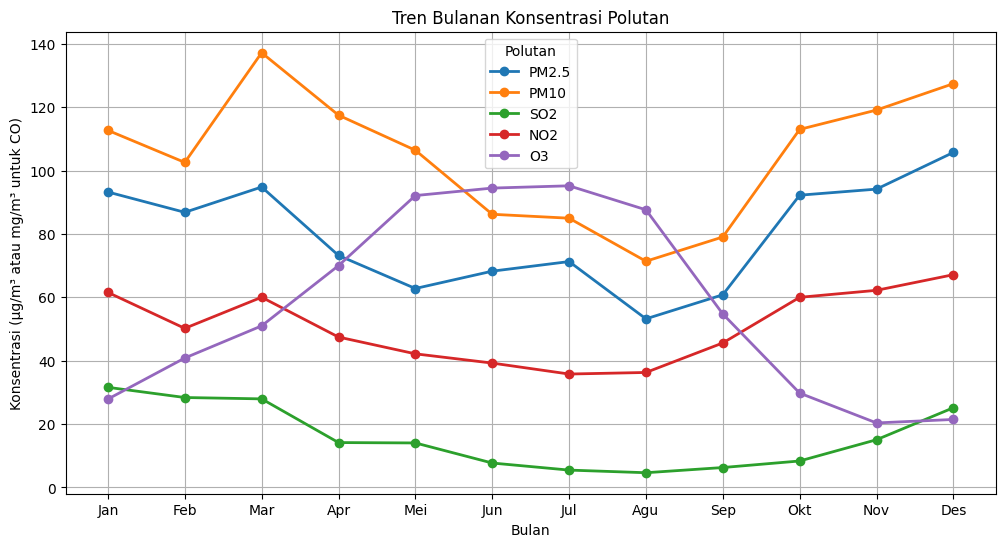

In [127]:
plt.figure(figsize=(12, 6))

# Plot tren bulanan
monthly_trend.plot(marker='o', linewidth=2, figsize=(12, 6))
plt.title('Tren Bulanan Konsentrasi Polutan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (µg/m³ atau mg/m³ untuk CO)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.legend(title='Polutan')
plt.grid(True)
plt.show()

#### Tren Harian

<Figure size 1200x600 with 0 Axes>

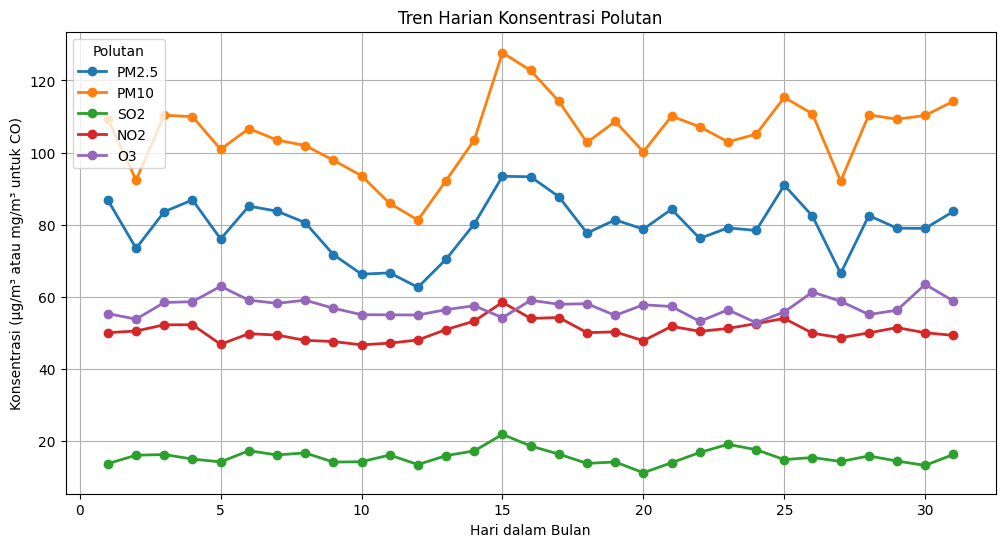

In [129]:
plt.figure(figsize=(12, 6))

# Plot tren harian
daily_trend.plot(marker='o', linewidth=2, figsize=(12, 6))
plt.title('Tren Harian Konsentrasi Polutan')
plt.xlabel('Hari dalam Bulan')
plt.ylabel('Konsentrasi (µg/m³ atau mg/m³ untuk CO)')
plt.legend(title='Polutan')
plt.grid(True)
plt.show()

### Pertanyaan 2:
Bagaimana perbandingan rata -rata kualitas udara antar stasiun pemantauan?

<Figure size 1200x600 with 0 Axes>

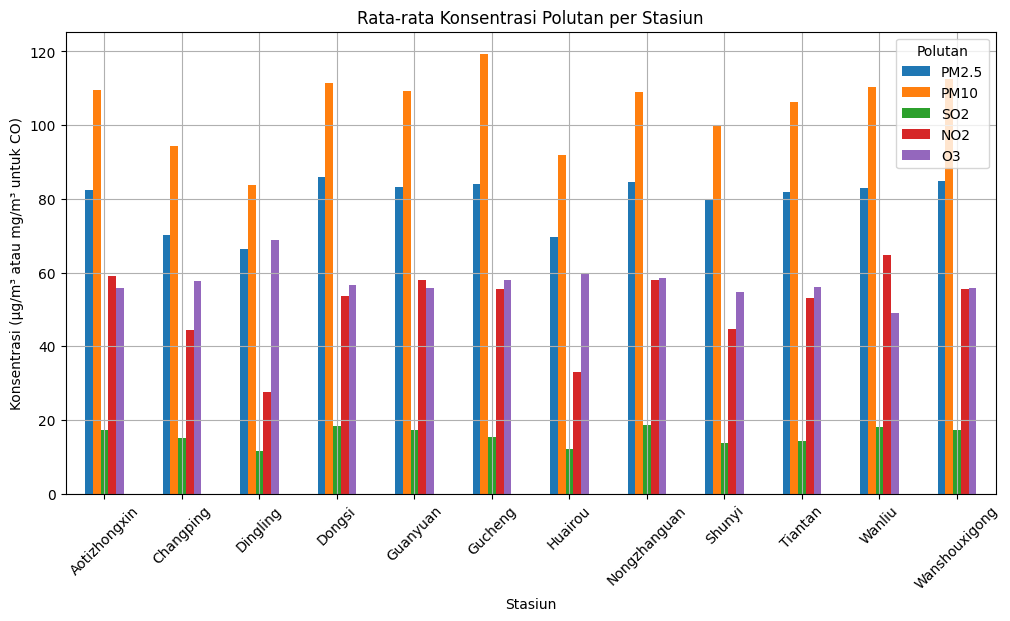

In [134]:
plt.figure(figsize=(12, 6))

# Plot
station_avg.plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Konsentrasi Polutan per Stasiun')
plt.xlabel('Stasiun')
plt.ylabel('Konsentrasi (µg/m³ atau mg/m³ untuk CO)')
plt.xticks(rotation=45)
plt.legend(title='Polutan')
plt.grid(True)
plt.show()

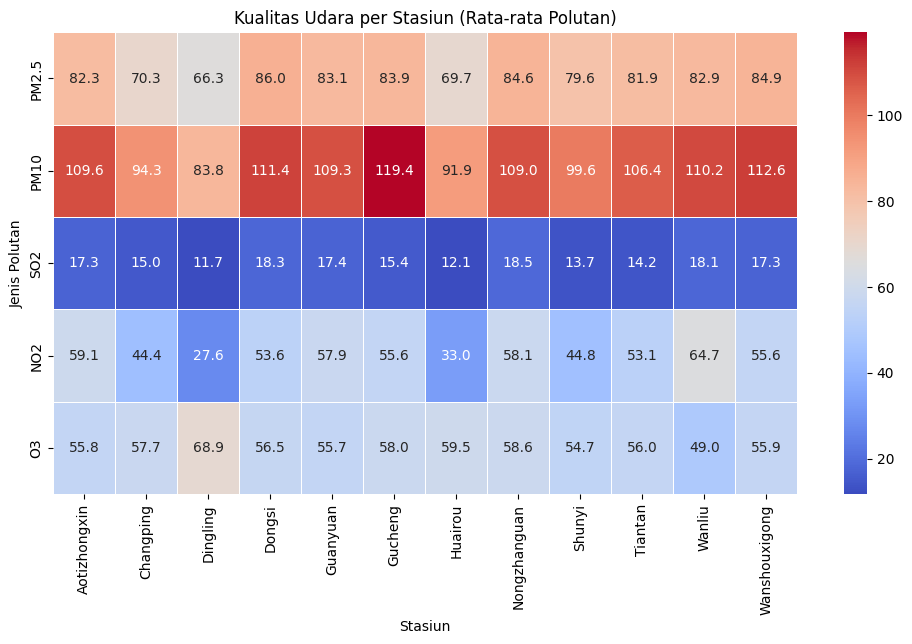

In [143]:
plt.figure(figsize=(12, 6))

# Heatmap rata-rata polutan per stasiun
sns.heatmap(station_avg.T, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)
plt.title("Kualitas Udara per Stasiun (Rata-rata Polutan)")
plt.xlabel("Stasiun")
plt.ylabel("Jenis Polutan")
plt.show()

### Pertanyaan 3:
Pada jam berapa dalam sehari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3) cenderung mencapai puncaknya?

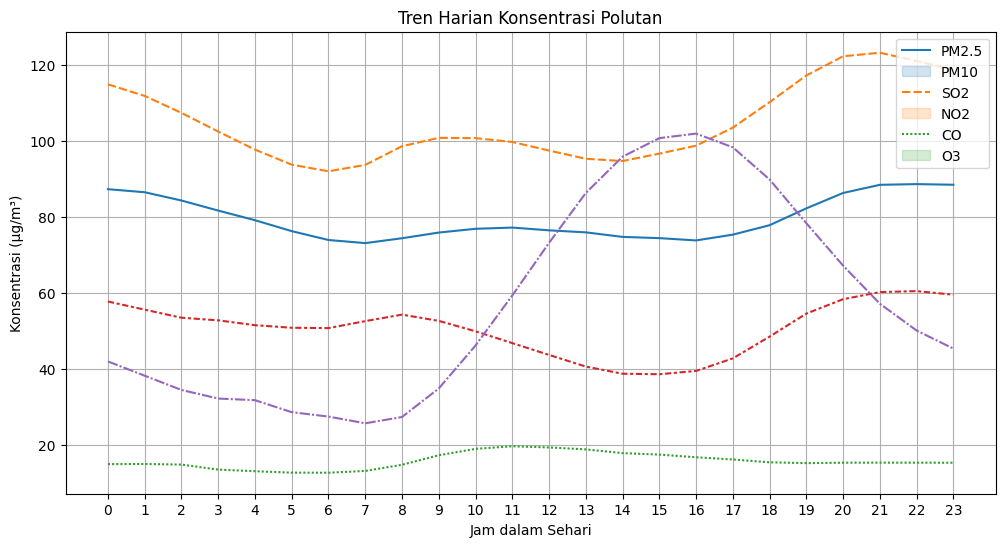

In [146]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg)
plt.title('Tren Harian Konsentrasi Polutan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Konsentrasi (µg/m³)')
plt.legend(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'])
plt.xticks(range(0, 24, 1))
plt.grid()
plt.show()

**Insight:**
*   Pertanyaan 1 : Bagaimana tren tahunan, bulanan, dan harian dari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3)?
1.   Tren Tahunan :
PM10 dan PM2.5 cenderung mengalami fluktuasi setiap tahun, tetapi tetap berada dalam rentang konsentrasi yang tinggi. PM10 mencapai puncaknya sekitar tahun 2014, mengalami sedikit penurunan, lalu meningkat lagi pada tahun 2017. O3 mengalami sedikit penurunan di tahun 2016 dan menurun lebih tajam pada 2017.
SO2 relatif stabil dengan sedikit kenaikan di tahun 2017. NO2 mengalami tren penurunan pada 2015–2016, tetapi kembali meningkat pada 2017.

2. Tren Bulanan :
PM10 dan PM2.5 cenderung meningkat pada awal dan akhir tahun (Januari–Maret, serta Oktober–Desember), sedangkan menurun pada pertengahan tahun. O3 mengalami pola yang berlawanan dengan PM10 dan PM2.5, dengan konsentrasi tertinggi pada pertengahan tahun (Juni–Agustus). SO2 dan NO2 memiliki fluktuasi yang lebih stabil, dengan tren yang tidak terlalu ekstrem dibanding polutan lainnya.
3. Tren Harian :
Konsentrasi PM10 dan PM2.5 menunjukkan pola yang berulang setiap bulan, dengan puncak konsentrasi sekitar pertengahan bulan. SO2 dan NO2 tetap relatif stabil dengan sedikit variasi harian. O3 menunjukkan sedikit peningkatan di pertengahan bulan, namun tidak setajam PM10 dan PM2.5.

* Pertanyaan 2 : Bagaimana perbandingan rata-rata kualitas udara antar stasiun pemantauan?
1. Stasiun dengan Polusi Udara Terparah yaitu Nongzhanguan, Dongsi, dan Tiantan. Stasiun ini memiliki tingkat polusi yang lebih tinggi dibandingkan yang lain, terutama dari PM10 dan NO2.
2. Stasiun dengan Kualitas Udara Lebih Baik yaitu Dingling dan Huairou cenderung memiliki konsentrasi polutan lebih rendah dibandingkan stasiun lainnya.
3. PM10 memiliki konsentrasi tertinggi dibandingkan polutan lain di hampir semua stasiun. Stasiun Nongzhanguan memiliki konsentrasi PM10 tertinggi (~119.4 µg/m³), diikuti oleh Dongsi dan Tiantan.
4. Stasiun dengan konsentrasi PM2.5 yang relatif tinggi adalah Dongsi dan Gucheng. Polutan NO2 memiliki variasi besar antar stasiun, dengan Tiantan memiliki tingkat tertinggi (~64.7 µg/m³).
5. SO2 memiliki konsentrasi rendah di semua stasiun, dengan Dingling sebagai yang terendah (~ 11.7 µg/m³). Polutan O3 cenderung lebih merata, tetapi Dingling memiliki konsentrasi tertinggi (~ 68.9 µg/m³).


* Pertanyaan 3 : Pada jam berapa dalam sehari konsentrasi polutan utama (PM2.5, PM10, SO2, NO2, O3) cenderung mencapai puncaknya?
1. Polutan PM2.5 : Cenderung mengalami kenaikan di malam hari dan mencapai puncaknya sekitar pukul 22.00 - 23.00.
2. Polutan PM10 : Memiliki tren yang mirip dengan PM2.5, dengan puncak konsentrasi terjadi sekitar 21.00 - 23.00.
3. Polutan SO2 : Konsentrasi relatif stabil dengan sedikit peningkatan di sore hari, tetapi tidak ada lonjakan signifikan.
4. Polutan NO2 : Mengalami peningkatan tajam mulai pukul 10.00 dan mencapai puncaknya sekitar 16.00 - 17.00, kemudian menurun setelahnya.
5. Polutan O3 : Konsentrasi meningkat secara signifikan mulai pagi hingga siang hari, mencapai puncaknya sekitar 15.00 - 16.00, lalu menurun setelahnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Polutan PM10 dan PM2.5 cenderung meningkat di awal dan akhir tahun, sementara O3 lebih tinggi di pertengahan tahun. Tren bulanan menunjukkan pola serupa, dengan PM10 dan PM2.5 lebih tinggi di musim dingin dan O3 meningkat di musim panas. Secara harian, PM10 dan PM2.5 memuncak di malam hari, sedangkan O3 di siang hari.
- Conclution pertanyaan 2 : Kualitas udara bervariasi antar stasiun, dengan Nongzhanguan, Dongsi, dan Tiantan memiliki tingkat polusi tertinggi, terutama untuk PM10 dan NO2. Sebaliknya, Dingling dan Huairou memiliki konsentrasi polutan yang lebih rendah. PM10 adalah polutan dominan di hampir semua stasiun, sementara SO2 memiliki konsentrasi yang relatif rendah di seluruh wilayah.
- Conclution pertanyaan 3 : Konsentrasi polutan bervariasi sepanjang hari. PM2.5 dan PM10 cenderung memuncak pada malam hari (sekitar pukul 21.00–23.00), sementara NO2 mencapai puncaknya di sore hari (sekitar pukul 16.00–17.00). O3 mengalami lonjakan tertinggi pada siang hari (sekitar pukul 15.00–16.00), sedangkan SO2 relatif stabil tanpa lonjakan signifikan.